In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from WelfareMeasures import *
from functions_njit import tax_rate_fct
from bernoulli_distribution import Bernoulli
from help_functions_non_njit import *
from graph_format import *
# load local model file and initialize model class
from model import ModelClass
from scipy.optimize import minimize

# Load original model

In [2]:
model = ModelClass() # set a few number of periods.

par = model.par
sol = model.sol
sim = model.sim
par.opt_tol = 1e-6
par.opt_maxiter = 1000

%time model.solve(do_print=False)
%time model.simulate()

CPU times: total: 8min 42s
Wall time: 1min 28s
CPU times: total: 2min 6s
Wall time: 29.3 s


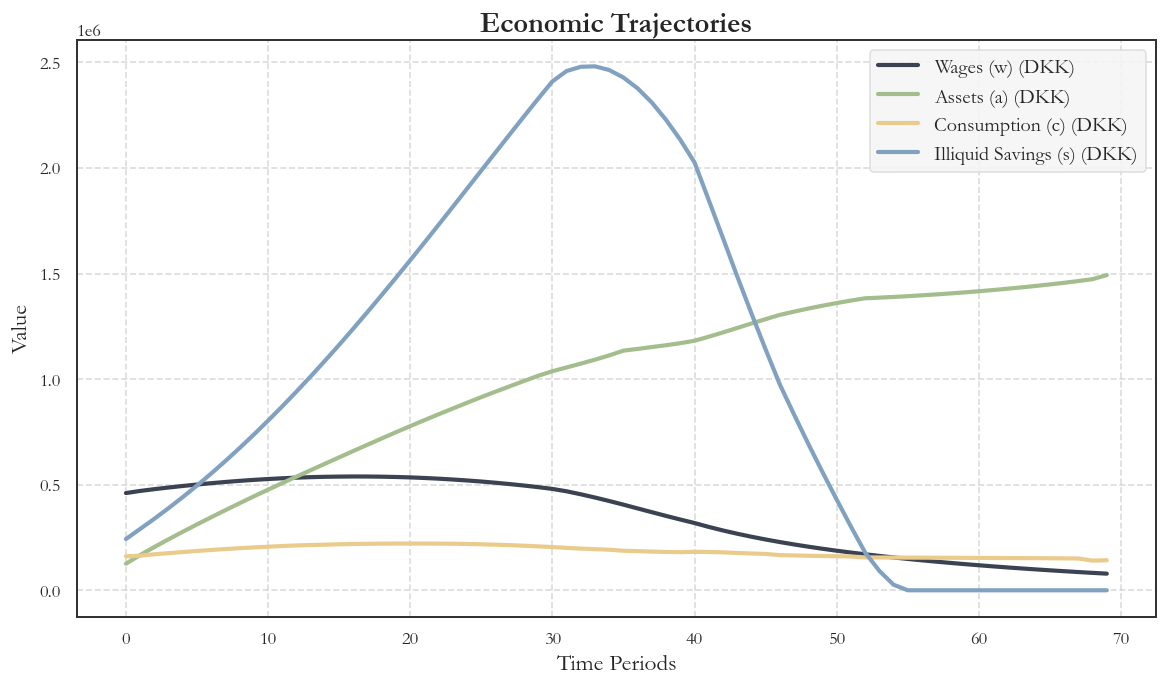

In [3]:
time = np.arange(par.T)
data_dict_basic = {
    "Wages (w)": {"data": np.mean(model.sim.w[:], axis=0), "unit": "DKK"},
    "Assets (a)": {"data": np.mean(model.sim.a[:], axis=0), "unit": "DKK"},
    "Consumption (c)": {"data": np.mean(model.sim.c[:], axis=0), "unit": "DKK"},
    "Illiquid Savings (s)": {"data": np.mean(model.sim.s[:], axis=0), "unit": "DKK"},
}

plot_simulation_one_graph(data_dict_basic, time, title="Economic Trajectories")

# Counter factual

In [4]:
# Change parameters and re-solve
# theta = [1.0]
# theta_names = ['alpha_f0']


# constant, beta1, beta2 = np.array([5.17959452e+00, 5.54957733e-01, 1.15837720e-04])
# time = np.arange(par.T)
# tau = np.maximum((constant + beta1*time + beta2*time**2) / 100, 0)


# theta = [tau]
# theta_names = ['tau']

theta = [36]
theta_names = ['retirement_age']


og_model, new_model =  make_new_model(model, theta, theta_names, do_print = False)


# Compare models 

c:\Users\peter\Desktop\Speciale\Design_retirement\WelfareMeasures.py:81: RuntimeWarning: Mean of empty slice
  sim_og_h = np.nanmean(sim_og_h_ex_1, axis=0)# age specific average
c:\Users\peter\Desktop\Speciale\Design_retirement\WelfareMeasures.py:82: RuntimeWarning: Mean of empty slice
  sim_new_h = np.nanmean(sim_new_h_ex_1, axis=0) # age specific average


[9417. 8874. 8782. 8707. 8702. 8746. 8716. 8704. 8701. 8689. 8654. 8668.
 8654. 8607. 8566. 8592. 8556. 8523. 8509. 8467. 8423. 8389. 8345. 8332.
 8264. 8189. 8121. 8088. 8020. 7940. 6935. 5807. 5096. 4409. 3798. 3385.
 2935. 2555. 2235. 1893.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
[9.417e+03 8.874e+03 8.801e+03 8.725e+03 8.721e+03 8.765e+03 8.734e+03
 8.723e+03 8.719e+03 8.707e+03 8.671e+03 8.687e+03 8.672e+03 8.625e+03
 8.585e+03 8.611e+03 8.575e+03 8.541e+03 8.527e+03 8.486e+03 8.441e+03
 8.406e+03 8.363e+03 8.350e+03 8.280e+03 8.206e+03 8.138e+03 8.105e+03
 8.036e+03 7.954e+03 7.879e+03 6.234e+03 5.172e+03 4.437e+03 3.745e+03
 3.161e+03 2.755e+03 2.409e+03 2.111e+03 1.805e+03 2.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.00

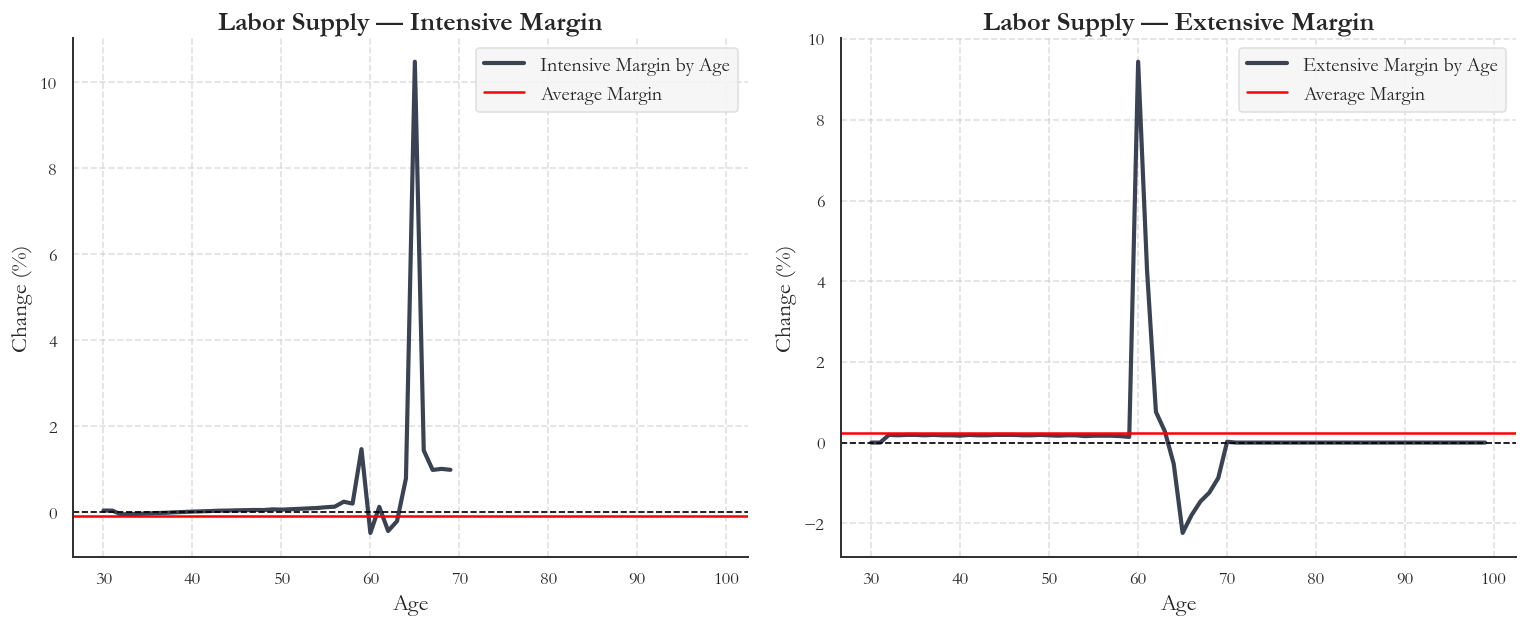

In [26]:
# Compare models 
# consumption_eq = find_consumption_equivalence(og_model, new_model, do_print= True, the_method = 'brentq')
intensive_margin, extensive_margin, intensive_margin_age, extensive_margin_age = labor_elasticity(og_model, new_model)


plot_labor_margins_by_age(
    intensive_age=intensive_margin_age,
    extensive_age=extensive_margin_age,
    avg_intensive=intensive_margin,
    avg_extensive=extensive_margin,
    age_start=par.start_age,
    title_prefix="Labor Supply — ",
    save_title="counterfactual_labor_margins_by_age.png"
)

# comparison of means

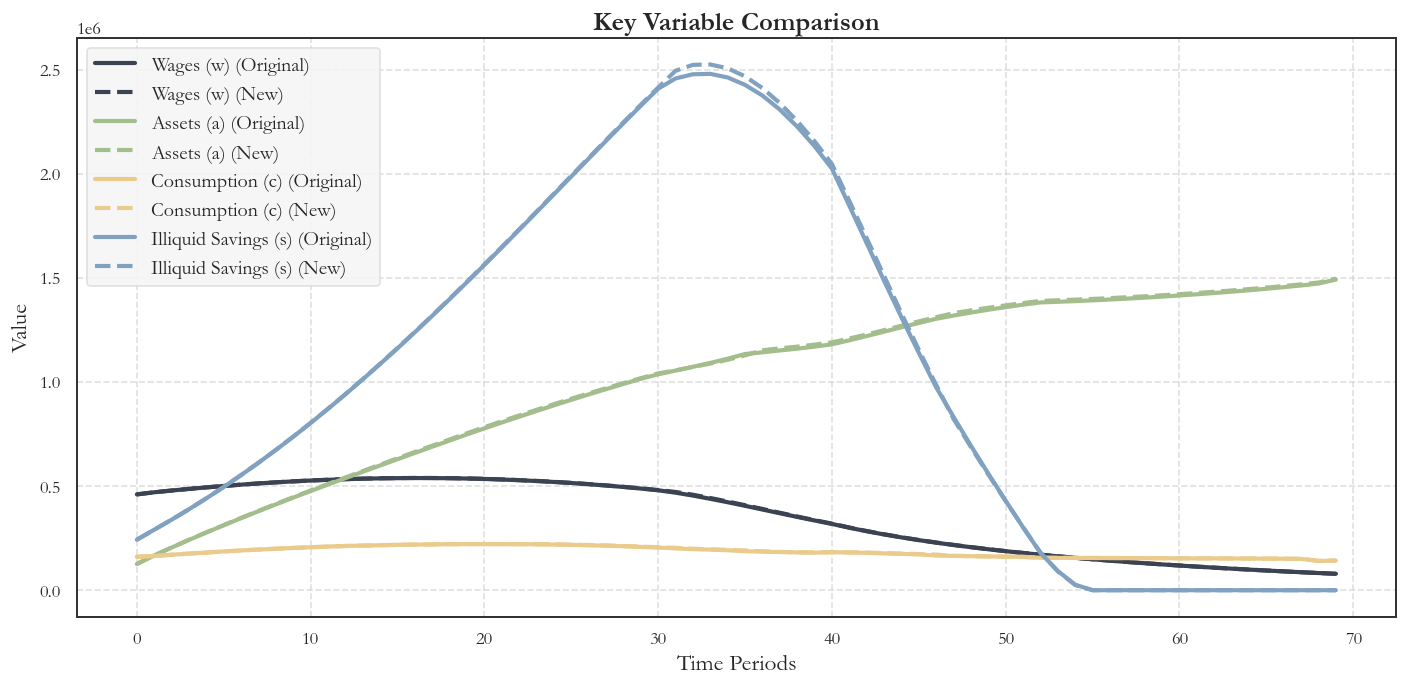

In [7]:
time = np.arange(par.T)

# Data for selected summary variables
summary_vars = ["Wages (w)", "Assets (a)", "Consumption (c)", "Illiquid Savings (s)"]
simulated_data_new = {
    "Wages (w)": np.mean(new_model.sim.w[:], axis=0),
    "Assets (a)": np.mean(new_model.sim.a[:], axis=0),
    "Consumption (c)": np.mean(new_model.sim.c[:], axis=0),
    "Illiquid Savings (s)": np.mean(new_model.sim.s[:], axis=0),
}
simulated_data_og = {
    "Wages (w)": np.mean(og_model.sim.w[:], axis=0),
    "Assets (a)": np.mean(og_model.sim.a[:], axis=0),
    "Consumption (c)": np.mean(og_model.sim.c[:], axis=0),
    "Illiquid Savings (s)": np.mean(og_model.sim.s[:], axis=0),
}

plot_comparison_single_panel(simulated_data_og, simulated_data_new, summary_vars, time, save_title="counterfactual_summary_vars.png")


C:\Users\peter\AppData\Local\Temp\ipykernel_7024\65369719.py:5: RuntimeWarning: Mean of empty slice
  "Hours (hours)": np.nanmean(np.where(new_model.sim.ex == 1, new_model.sim.h, np.nan), axis=0),
C:\Users\peter\AppData\Local\Temp\ipykernel_7024\65369719.py:17: RuntimeWarning: Mean of empty slice
  "Hours (hours)": np.nanmean(np.where(og_model.sim.ex == 1, og_model.sim.h, np.nan), axis=0),
C:\Users\peter\AppData\Local\Temp\ipykernel_7024\65369719.py:29: RuntimeWarning: Mean of empty slice
  "Hours (hours)": np.nanmean(np.where(new_model.sim.ex == 1, new_model.sim.h, np.nan), axis=0)
C:\Users\peter\AppData\Local\Temp\ipykernel_7024\65369719.py:30: RuntimeWarning: Mean of empty slice
  - np.nanmean(np.where(og_model.sim.ex == 1, og_model.sim.h, np.nan), axis=0),


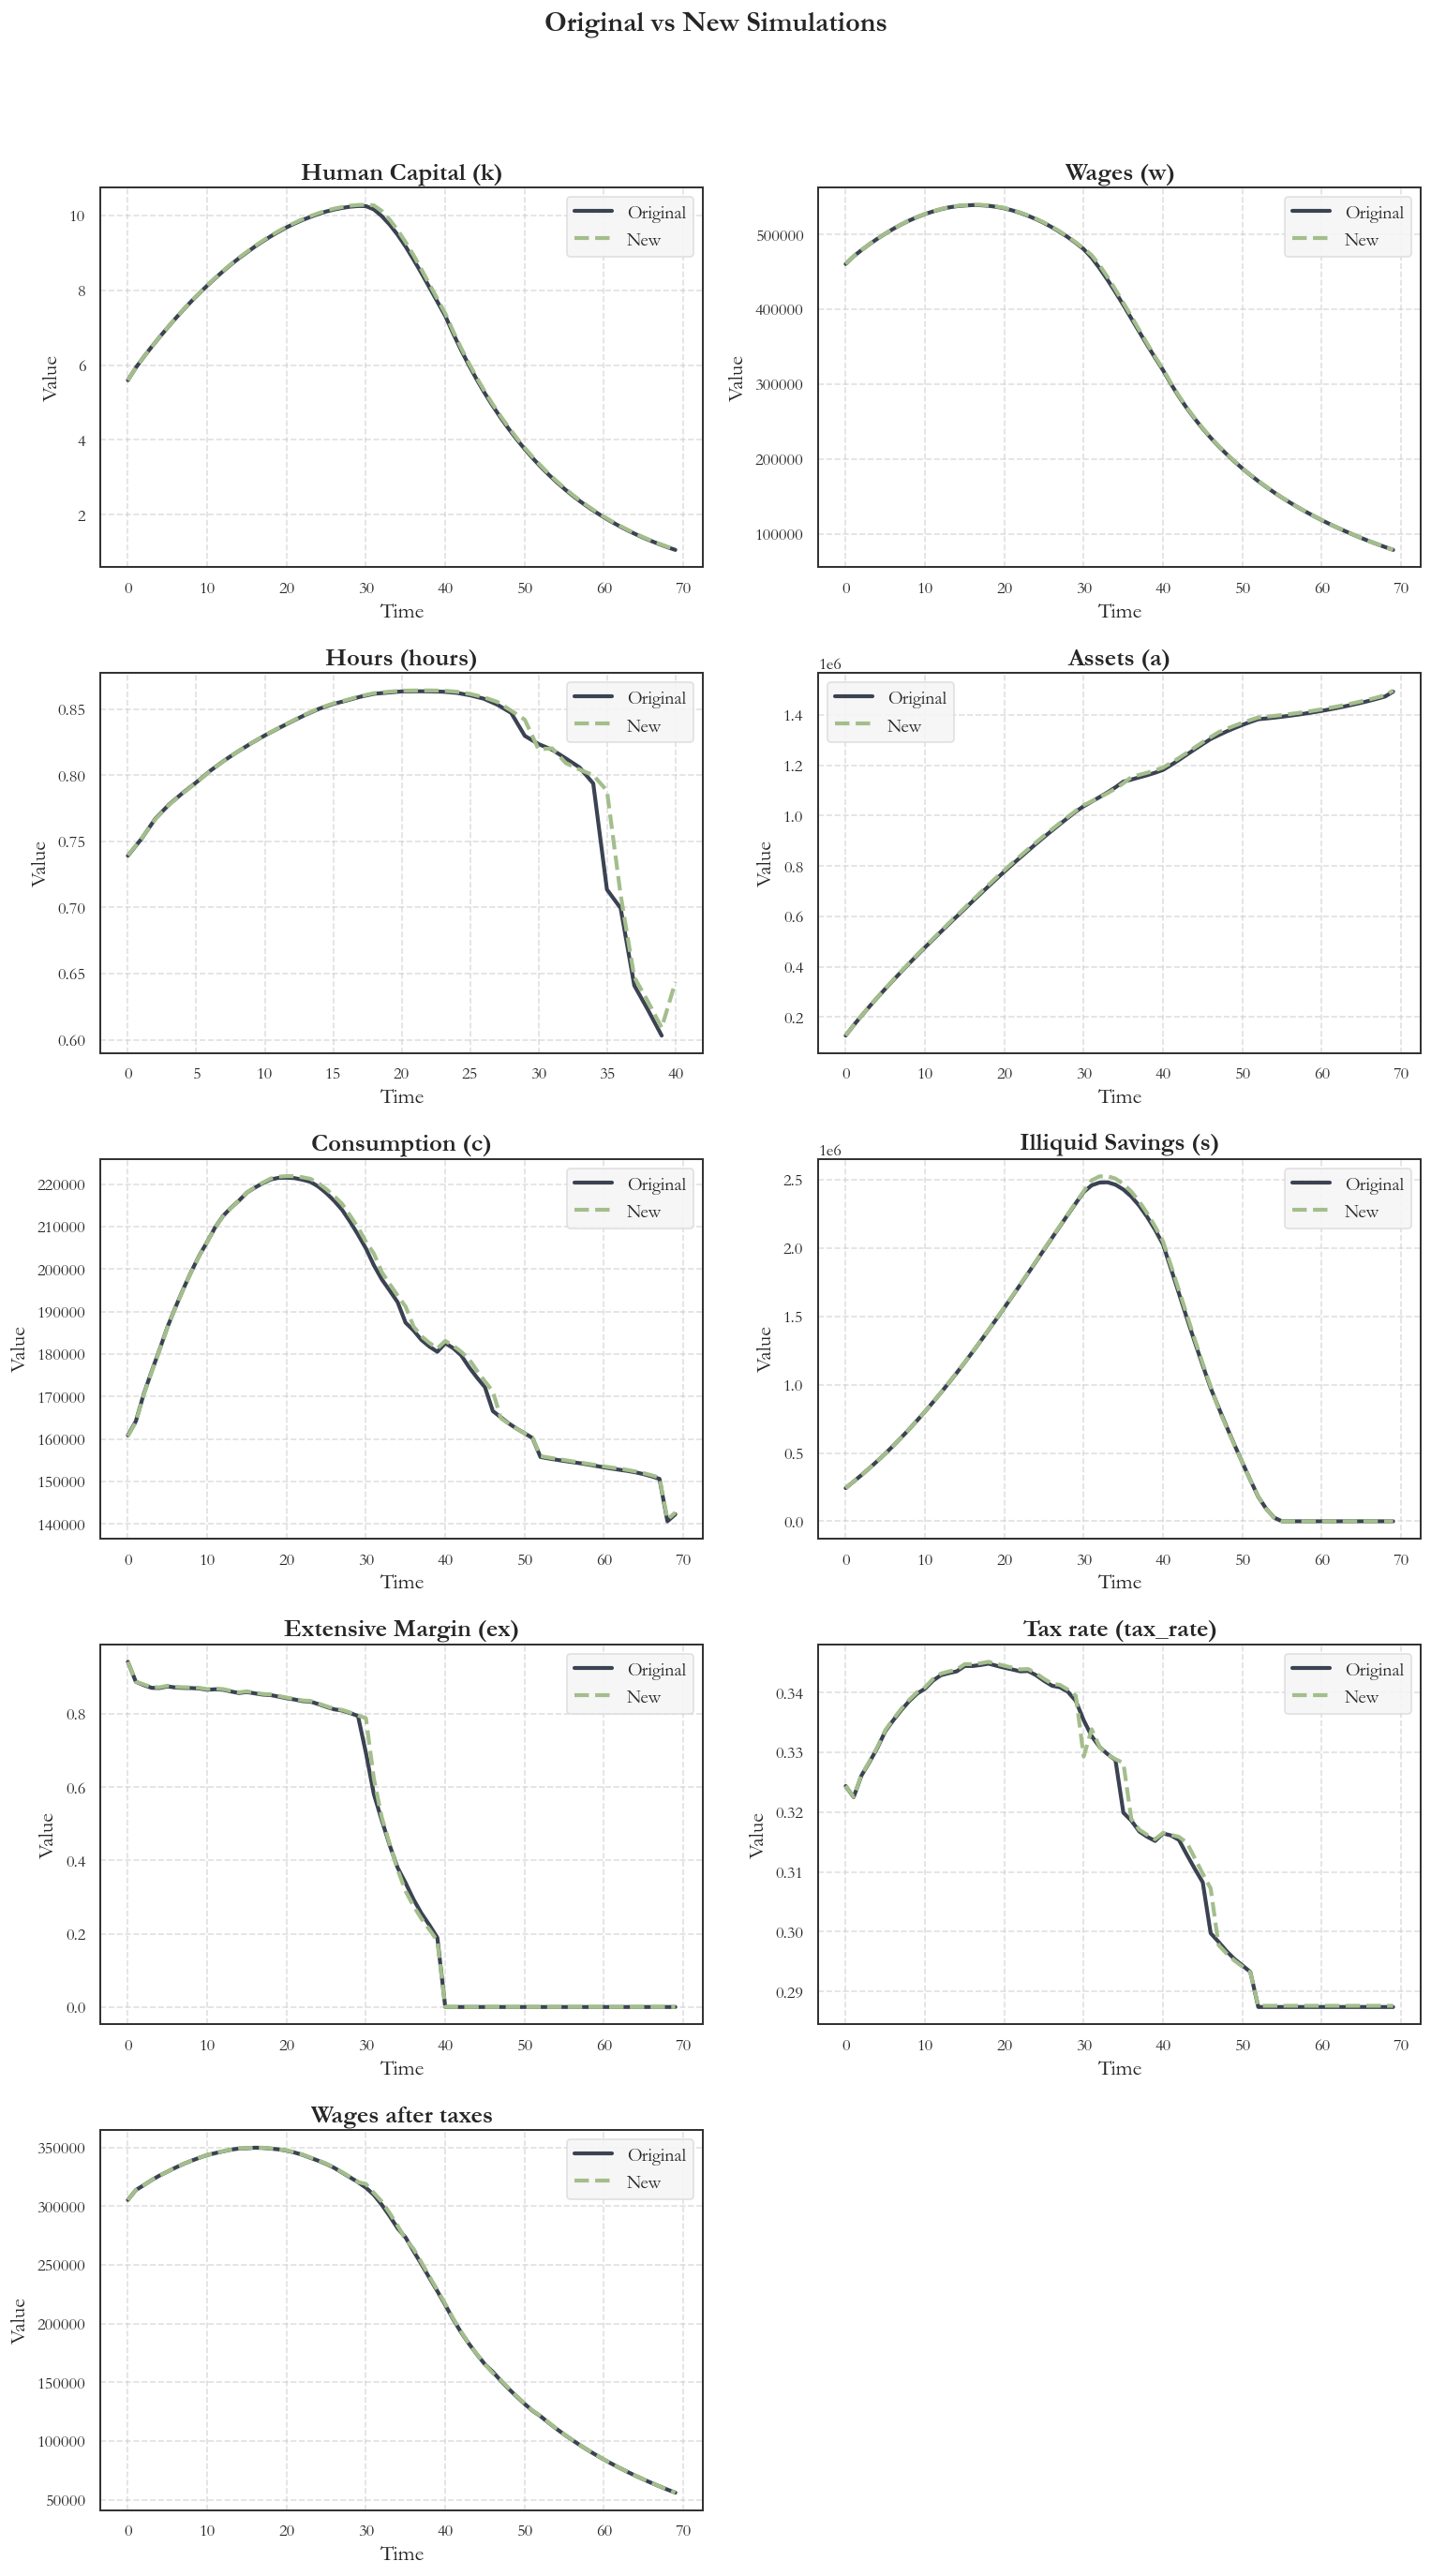

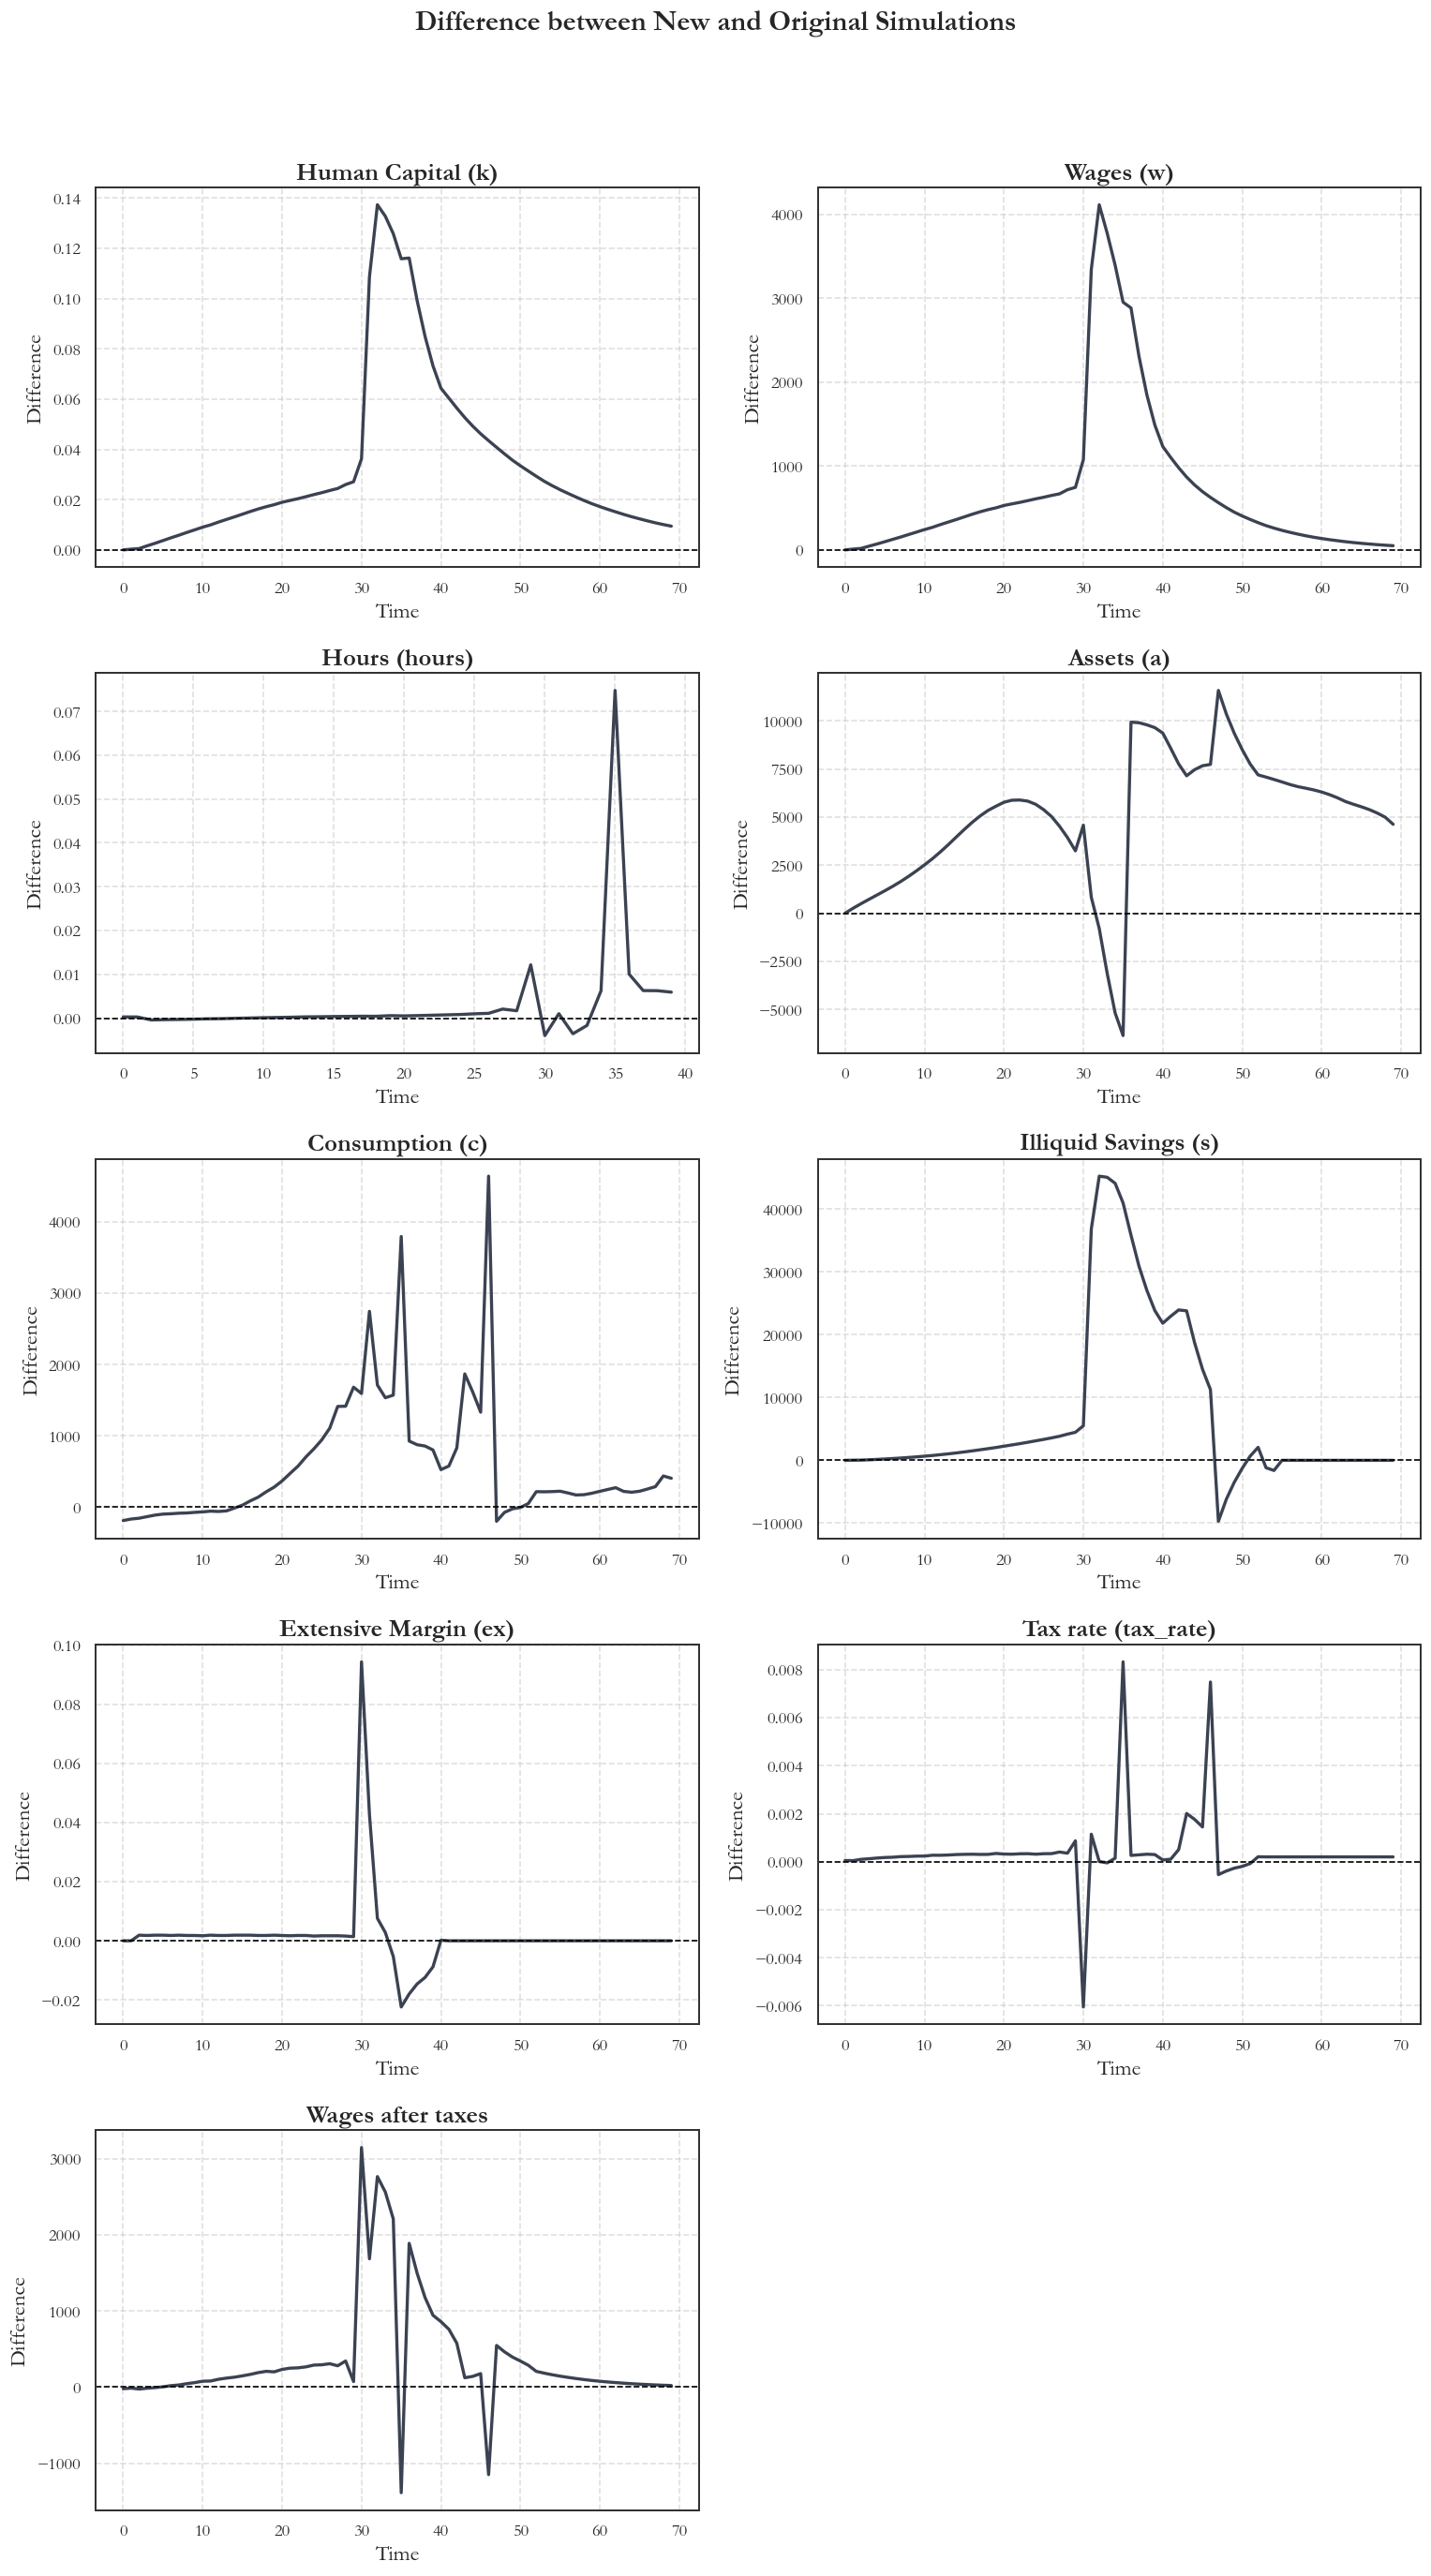

In [8]:

# Full variable set
data_dict_new = {
    "Human Capital (k)": np.mean(new_model.sim.k[:], axis=0),
    "Wages (w)": np.mean(new_model.sim.w[:], axis=0),
    "Hours (hours)": np.nanmean(np.where(new_model.sim.ex == 1, new_model.sim.h, np.nan), axis=0),
    "Assets (a)": np.mean(new_model.sim.a[:], axis=0),
    "Consumption (c)": np.mean(new_model.sim.c[:], axis=0),
    "Illiquid Savings (s)": np.mean(new_model.sim.s[:], axis=0),
    "Extensive Margin (ex)": np.mean(new_model.sim.ex[:], axis=0),
    "Tax rate (tax_rate)": np.mean(new_model.sim.tax_rate[:,:], axis=0),
    "Wages after taxes": np.mean((1 - new_model.sim.tax_rate[:,:]) * new_model.sim.w[:,:], axis=0),
}

data_dict_og = {
    "Human Capital (k)": np.mean(og_model.sim.k[:], axis=0),
    "Wages (w)": np.mean(og_model.sim.w[:], axis=0),
    "Hours (hours)": np.nanmean(np.where(og_model.sim.ex == 1, og_model.sim.h, np.nan), axis=0),
    "Assets (a)": np.mean(og_model.sim.a[:], axis=0),
    "Consumption (c)": np.mean(og_model.sim.c[:], axis=0),
    "Illiquid Savings (s)": np.mean(og_model.sim.s[:], axis=0),
    "Extensive Margin (ex)": np.mean(og_model.sim.ex[:], axis=0),
    "Tax rate (tax_rate)": np.mean(og_model.sim.tax_rate[:,:], axis=0),
    "Wages after taxes": np.mean((1 - og_model.sim.tax_rate[:,:]) * og_model.sim.w[:,:], axis=0),
}

data_dict_diff = {
    "Human Capital (k)": np.mean(new_model.sim.k[:], axis=0) - np.mean(og_model.sim.k[:], axis=0),
    "Wages (w)": np.mean(new_model.sim.w[:], axis=0) - np.mean(og_model.sim.w[:], axis=0),
    "Hours (hours)": np.nanmean(np.where(new_model.sim.ex == 1, new_model.sim.h, np.nan), axis=0)
                    - np.nanmean(np.where(og_model.sim.ex == 1, og_model.sim.h, np.nan), axis=0),
    "Assets (a)": np.mean(new_model.sim.a[:], axis=0) - np.mean(og_model.sim.a[:], axis=0),
    "Consumption (c)": np.mean(new_model.sim.c[:], axis=0) - np.mean(og_model.sim.c[:], axis=0),
    "Illiquid Savings (s)": np.mean(new_model.sim.s[:], axis=0) - np.mean(og_model.sim.s[:], axis=0),
    "Extensive Margin (ex)": np.mean(new_model.sim.ex[:], axis=0) - np.mean(og_model.sim.ex[:], axis=0),
    "Tax rate (tax_rate)": np.mean(new_model.sim.tax_rate[:,:], axis=0) - np.mean(og_model.sim.tax_rate[:,:], axis=0),
    "Wages after taxes": (
        np.mean((1 - new_model.sim.tax_rate[:,:]) * new_model.sim.w[:,:], axis=0)
        - np.mean((1 - og_model.sim.tax_rate[:,:]) * og_model.sim.w[:,:], axis=0)
    ),
}

plot_comparison_grid(data_dict_og, data_dict_new, time, title="Original vs New Simulations", save_title="counterfactual_full_vars.png")
plot_difference_grid(data_dict_diff, time, title="Difference between New and Original Simulations", save_title="counterfactual_diff_full_vars.png")


In [9]:
# 1. Find last time ex == 1 for each individual
last_working = np.full(og_model.sim.ex.shape[0], np.nan)  # initialize

for i in range(og_model.sim.ex.shape[0]):
    working = np.where(og_model.sim.ex[i, :] == 1)[0]  # find where ex=1
    if working.size > 0:
        last_working[i] = working[-1]  # last time they worked (take last index)

# 1. Find last time ex == 1 for each individual
last_working_new = np.full(new_model.sim.ex.shape[0], np.nan)  # initialize

for i in range(new_model.sim.ex.shape[0]):
    working_new = np.where(new_model.sim.ex[i, :] == 1)[0]  # find where ex=1
    if working_new.size > 0:
        last_working_new[i] = working_new[-1]  # last time they worked (take last index)


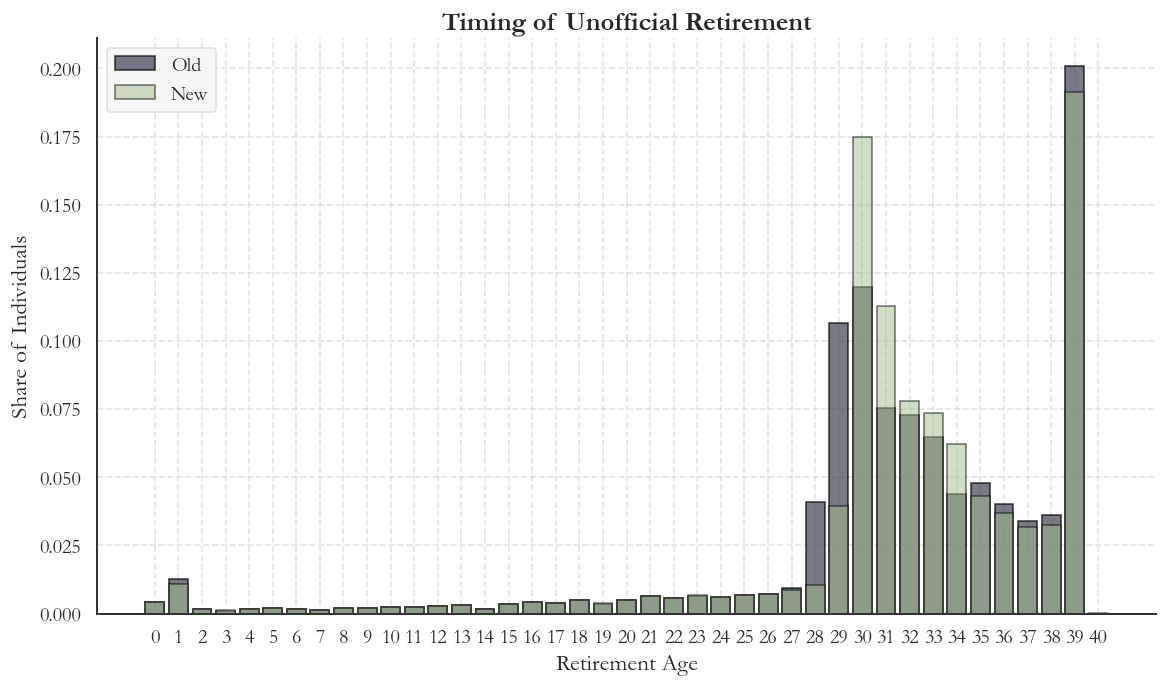

In [10]:
plot_event_bar_series(
    values1=last_working,
    values2=last_working_new,
    xlabel="Retirement Age",
    title="Timing of Unofficial Retirement",
    label1="Old",
    label2=f'New',
    save_title="counterfactual_retirement_age.png",
)


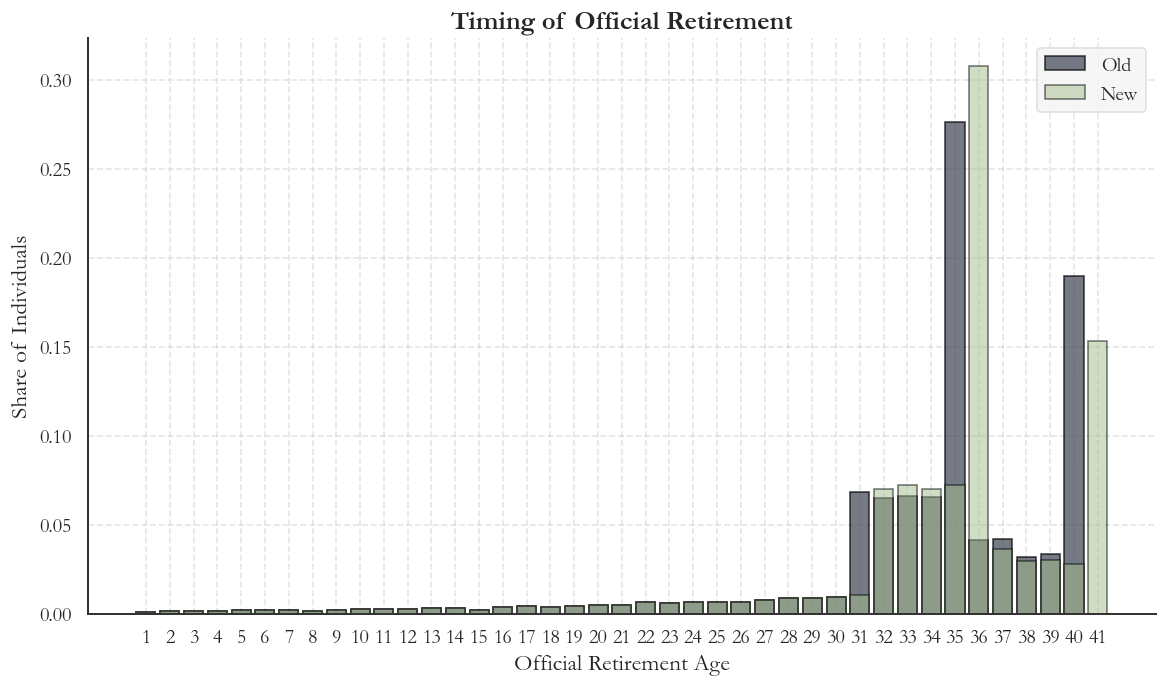

In [11]:
# 1. Find first time e == 2 for each individual
first_retirement = np.full(og_model.sim.e.shape[0], np.nan)  # initialize

for i in range(og_model.sim.e.shape[0]):
    retired = np.where(og_model.sim.e[i, :] == 2)[0]  # find where e=2
    if retired.size > 0:
        first_retirement[i] = retired[0]  # first time they retire

first_retirement_new = np.full(new_model.sim.e.shape[0], np.nan)  # initialize

for i in range(new_model.sim.e.shape[0]):
    retired_new = np.where(new_model.sim.e[i, :] == 2)[0]  # find where e=2
    if retired_new.size > 0:
        first_retirement_new[i] = retired_new[0]  # first time they retire
plot_event_bar_series(
    values1=first_retirement,
    values2=first_retirement_new,
    xlabel="Official Retirement Age",
    title="Timing of Official Retirement",
    label1="Old",
    label2=f'New',
    save_title="counterfactual_official_retirement_age.png",
)


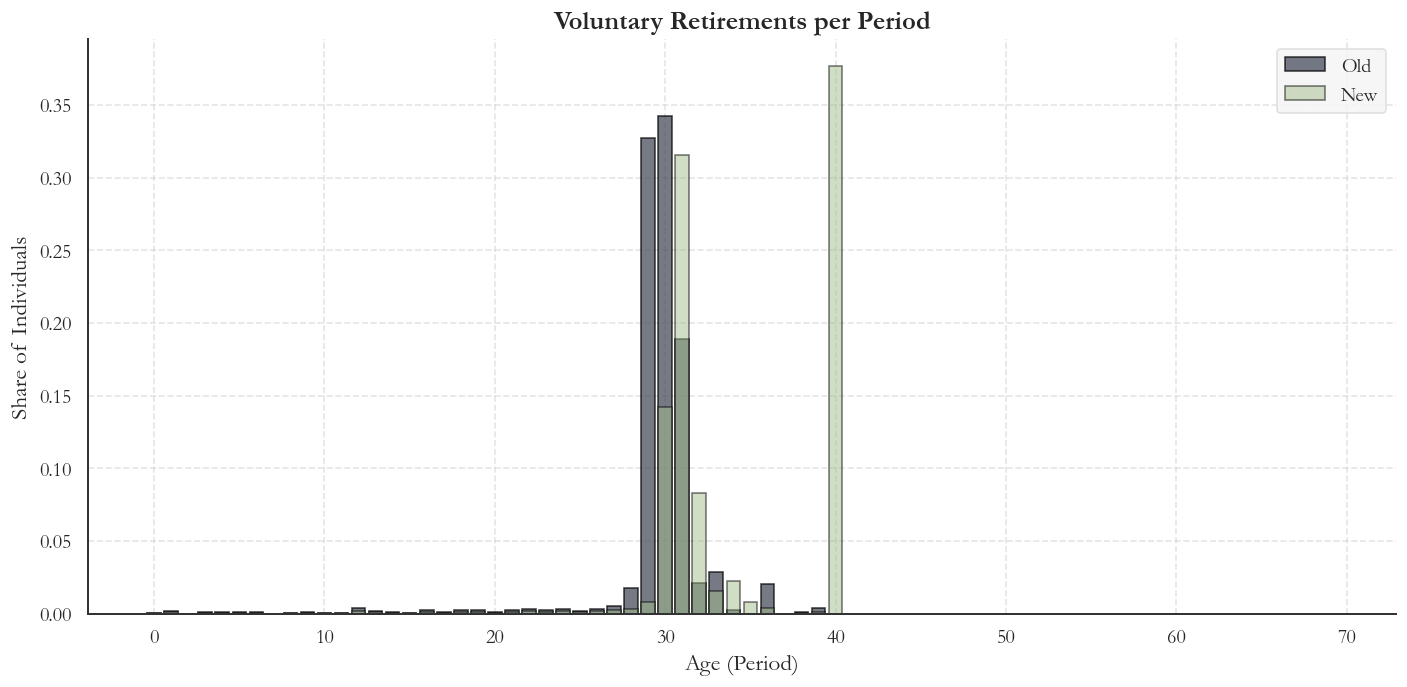

In [15]:
og_ret_counts = np.sum(og_model.sim.ret_flag[:, :], axis=0)
new_ret_counts = np.sum(new_model.sim.ret_flag[:, :], axis=0)
plot_bar_series_comparison(
    og_ret_counts,
    new_ret_counts,
    label1="Old",
    label2=f"New",
    title="Voluntary Retirements per Period",
    xlabel="Age (Period)",
    normalize=True,
    save_title="counterfactual_retirement_counts.png",
)


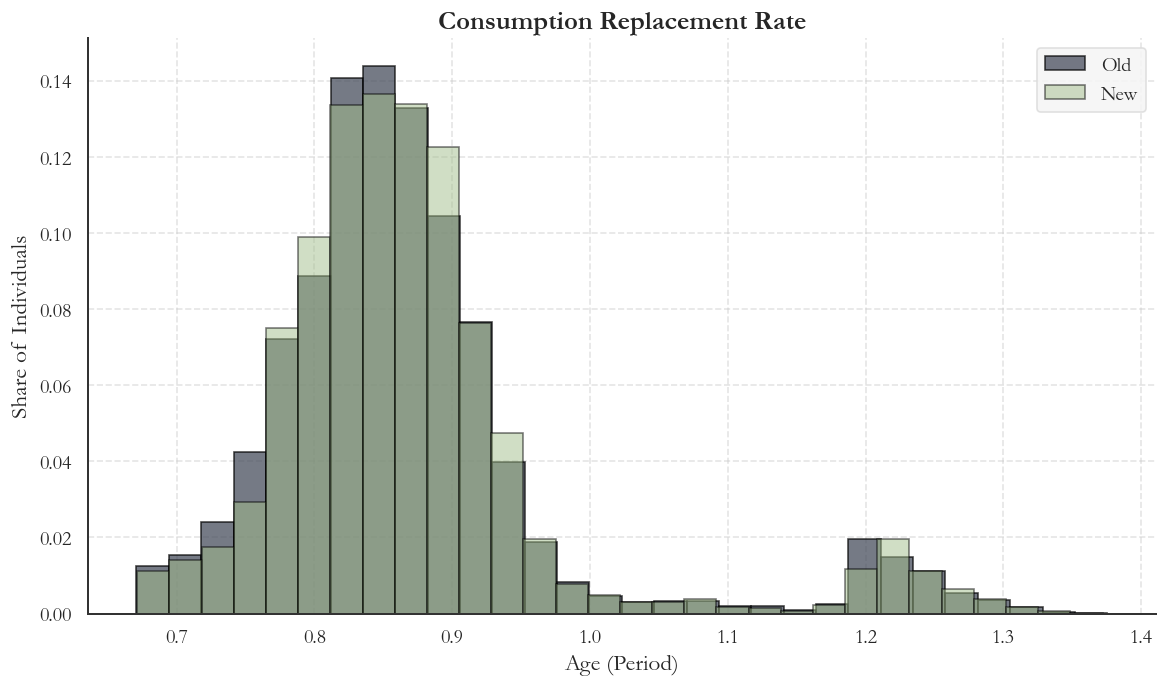

In [13]:
plot_event_histogram(
    values1=consumption_replacement_rate_fct(og_model),
    values2=consumption_replacement_rate_fct(new_model),
    xlabel="Age (Period)",
    title="Consumption Replacement Rate",
    label1="Old",
    label2=f'New',
    bins=30,
    save_title="counterfactual_consumption_replacement_histogram.png",
)

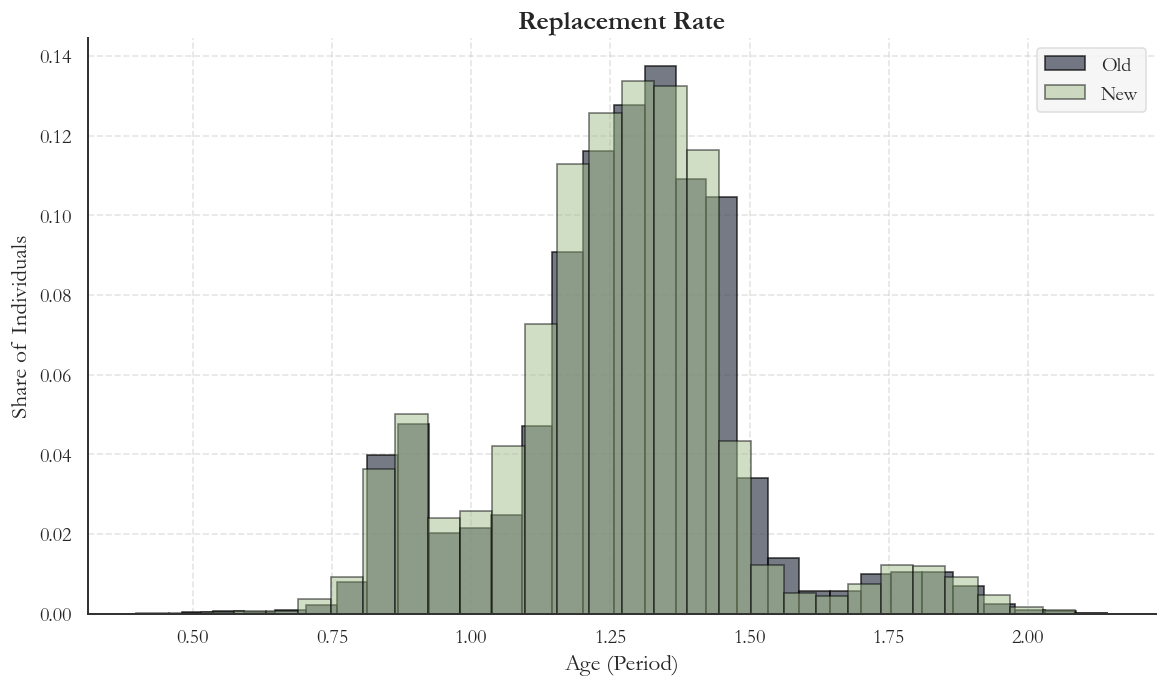

In [14]:
plot_event_histogram(
    values1=replacement_rate_fct(og_model),
    values2=replacement_rate_fct(new_model),
    xlabel="Age (Period)",
    title="Replacement Rate",
    label1="Old",
    label2=f'New',
    bins=30,
    save_title="counterfactual_consumption_replacement_histogram.png",
)

# Comparison of retirement age

# replacement rates

In [ ]:
assert False

AssertionError: 